In [430]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Create fake data

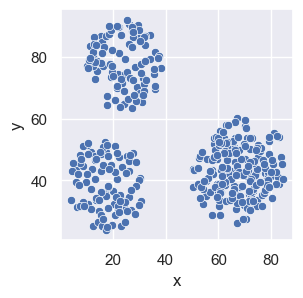

In [518]:
def circulo(num_datos = 20,R = 1, minimo = 0,maximo= 1, center_x = 0 , center_y = 0,random_seed=None):
    np.random.seed(random_seed)
    pi = math.pi
    r = R * np.sqrt(np.random.uniform(minimo, maximo, size = num_datos)) 
    theta = np.random.uniform(minimo, maximo, size= num_datos) * 2 * pi

    x = center_x + np.cos(theta) * r
    y = center_y + np.sin(theta) * r

    x = np.round(x,3)
    y = np.round(y,3)

    df = np.column_stack([x,y])
    df = pd.DataFrame(df)
    df.columns = ['x','y']
    return(df)

# Create data
R =15; 
n = 4; # number of clusters 
clusters = []
x_center_limits = [R,100-R]
y_center_limits = [R,100-R]
random_seed=100
for i in range(n):
    x_center = np.random.uniform(x_center_limits[0],x_center_limits[1])
    y_center = np.random.uniform(y_center_limits[0],y_center_limits[1])
    clusters.append(circulo(num_datos = 100,R = R, center_x = x_center, center_y = y_center))


data = pd.concat(clusters,sort=False)
data = data.sample(frac=1)
ax,fig = plt.subplots(figsize=(3,3))
sns.set_theme()
sns.scatterplot(x="x",y="y",data=data)
plt.show()

## Initialize centroids randomly 

In [520]:
data.sample(n=3)

,x,y
2,18.680,43.721
51,65.419,48.732
6,57.537,28.944


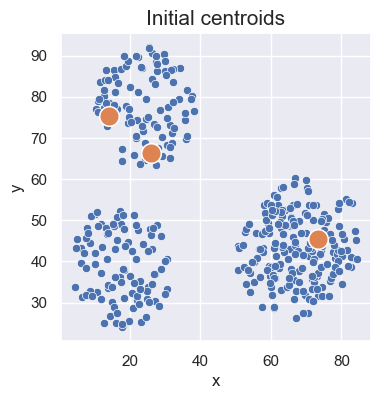

In [604]:
k = 3 # number of clusters 

dim = data.shape[1] # number of dimensions 

data_min = data.min().min()
data_max = data.max().max()


df_centroids = data.sample(n=3)
centroids = df_centroids.values
# for i in range(k):
#     centroid = np.random.uniform(data_min,data_max,dim)
#     centroids.append(centroid)


# for i in range(1):
#     centroid = np.random.uniform(data_min,data_max,dim)
#     centroids.append(centroid)
    
# df_centroids = pd.DataFrame(centroids,columns=['x','y'])
df_centroids.head()


fig, ax = plt.subplots(figsize=(4,4))
# data.plot.scatter(x='x',y='y',ax=ax)
sns.scatterplot(x="x",y="y",data=data)
df_centroids.plot.scatter(x='x',y='y',ax=ax,c = 'r')
sns.scatterplot(x="x",y="y",data=df_centroids,ax=ax,s=200)
ax.set_title('Initial centroids',fontsize=15)
plt.show()

In [599]:
centroids_new[1]

array([17.61497, 38.4582 ])

## Assign data to closest centroids and update centroids till convergence

In [544]:
# calculates the euclidean distance between point p1 and point p1
def get_distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

[[19.25147273 82.85621818]
 [21.23773103 49.07041379]
 [67.484795   43.315305  ]]
[[23.68103261 79.43973913]
 [18.14487963 40.40598148]
 [67.484795   43.315305  ]]
[[23.76805  78.26482 ]
 [17.61497  38.4582  ]
 [67.484795 43.315305]]
The number of iterations is 4.


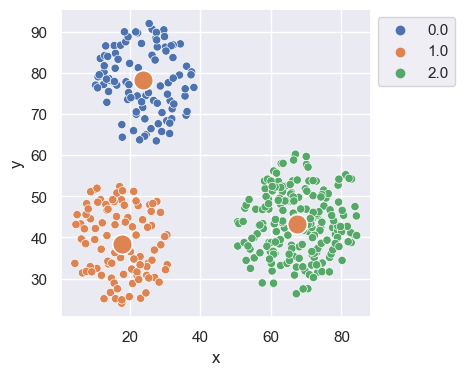

In [605]:
max_iter= 50
N = data.shape[0] # number of datapoints 


for iter_num in range(max_iter):
    closest_centroids = np.zeros(N)
    total_distances = 0
    for i in range(N):
        distances = np.zeros(k)
        for j in range(k):
            centroid = centroids[j]
            distances[j] = get_distance(np.array(data.iloc[i,:]),centroids[j])
 
        # find cloest centroid 
        index = np.where(distances==distances.min())[0][0]
        total_distances += distances.min()
        closest_centroids[i] = index
    # update centroids
    centroids_new = np.zeros((k,dim))
    for j in range(k):
        indices = np.where(closest_centroids==j)[0].tolist()
        # in the case where a centroid is not closest to any data 
        if indices == []:
            centroids_new[j] =  centroids[j]
        else: # update new centroids 
            centroids_new[j] = np.array(data.iloc[indices,:].mean())
    if (np.array(centroids_new) == np.array(centroids)).all():
        break

    centroids =   centroids_new[:] 
    print(centroids)

print(f"The number of iterations is {iter_num+1}.")
data2 = data.copy()
data2['closest_centroids'] = closest_centroids
df_centroids = pd.DataFrame(centroids,columns=['x','y'])

fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(data=data2,x="x",y="y",hue="closest_centroids",ax=ax,palette="deep")
sns.scatterplot(data=df_centroids,x="x",y="y",s = 200, ax=ax)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()


## Rewrite everything as a function

In [612]:
def k_means(df,k,max_iter,tol):
    new_data = df.copy()
    dim = data.shape[1] # number of dimensions 
    data_min = data.min().min()
    data_max = data.max().max()
    
    centroids = np.array(new_data.sample(n=k).values)
    N = data.shape[0] # number of datapoints 
    
    for iter_num in range(max_iter):
        closest_centroids = np.zeros(N)
        for i in range(N):
            distances = np.zeros(k)
            for j in range(k):
                centroid = centroids[j]
                distances[j] = get_distance(np.array(df.iloc[i,:]),centroids[j])
                # get distances from each centroid 

            # find cloest centroid 
            index = np.where(distances==distances.min())[0][0]
            closest_centroids[i] = index
        centroids_new = np.zeros((k,dim))
        # update centroids
        for j in range(k):
            indices = np.where(closest_centroids==j)[0].tolist()
            # in the case where a centroid is not closest to any data 
            if indices == []:
                centroids_new[j] =  centroids[j]
            else: # update new centroids 
                centroids_new[j] = np.array(df.iloc[indices,:].mean())
                
        if (np.array(centroids_new) == np.array(centroids)).all():
            break

        centroids =   centroids_new[:]
    
    # compute total distances
    distances = np.zeros(N)
    for i in range(N):   
        distances[i] = get_distance(np.array(df.iloc[i,:]),centroids[int(closest_centroids[i])])
    sum_of_distances = np.sum(distances)
        
    new_data['closest_centroids'] = closest_centroids
    centroids_df = pd.DataFrame(centroids,columns=['x','y'])
    print(f"The number of iterations is {iter_num+1}.")
    
    return new_data, centroids_df, sum_of_distances

The number of iterations is 4.


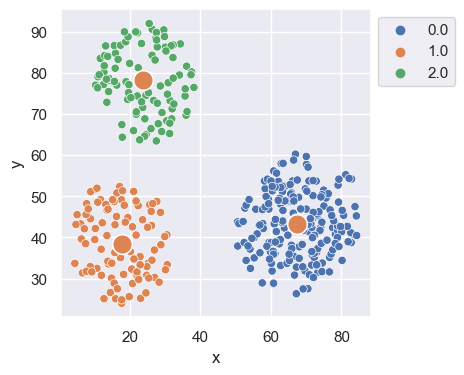

In [617]:
max_iter = 50
k =3

new_data, centroid_data, sum_of_distances = k_means(data,k,max_iter,tol);

fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(data=new_data,x="x",y="y",hue="closest_centroids",ax=ax,palette="deep")
sns.scatterplot(data=centroid_data,x="x",y="y",s = 200, ax=ax)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()



## Which k should we use? 

The number of iterations is 2.
The number of iterations is 4.
The number of iterations is 3.
The number of iterations is 5.
The number of iterations is 18.
The number of iterations is 10.
The number of iterations is 16.
The number of iterations is 6.
The number of iterations is 18.


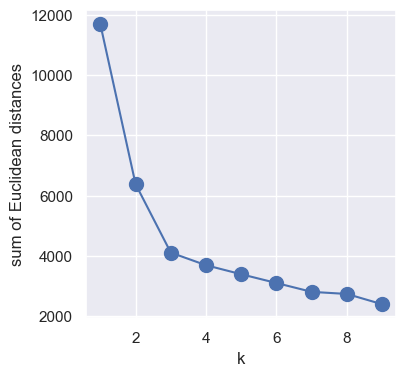

In [618]:
max_iter = 50
sum_of_distances_list = []
k_list = list(range(1,10))
for k in k_list:
    new_data, centroid_data, sum_of_distances = k_means(data,k,max_iter,tol)
    sum_of_distances_list.append(sum_of_distances)

fig, ax = plt.subplots(figsize=(4,4))
ax.plot(k_list,sum_of_distances_list,'o-',markersize=10)
ax.set_xlabel('k')
ax.set_ylabel('sum of Euclidean distances')
plt.show()